#CIFAR-10#

## Pakiety

In [1]:
import keras
from keras.datasets import cifar10 as dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import *

## Wizualizacja

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

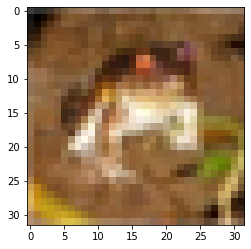

In [4]:
plt.imshow(X_train[0])

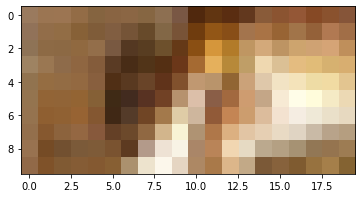

In [5]:
image_slice = X_train[0][10:20, 0:20]
#print(image_slice)
plt.imshow(image_slice)

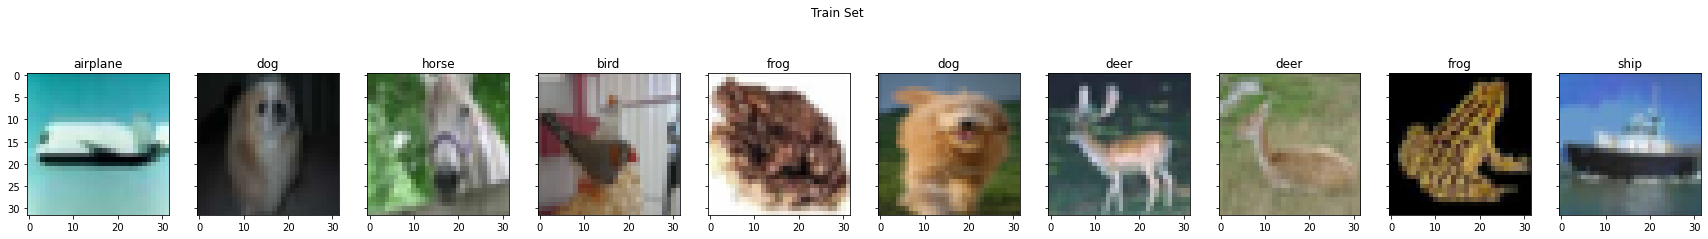

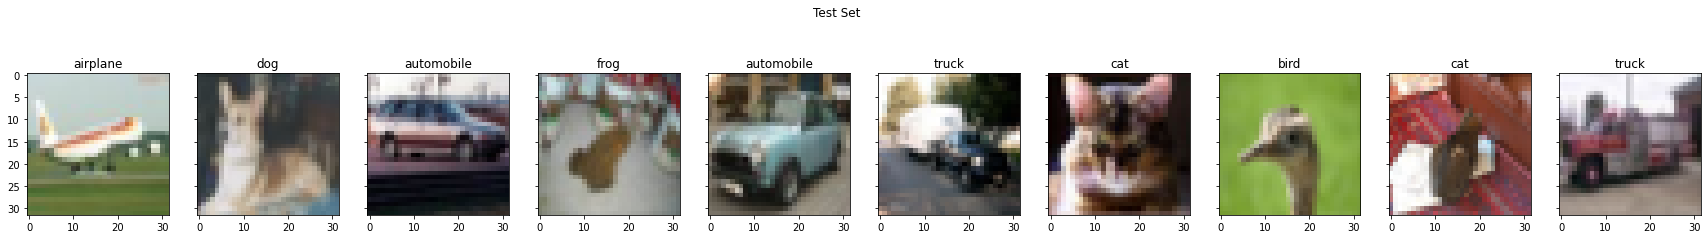

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(10*3,4), sharey=True)
fig.suptitle('Train Set')
for i in range(10):
  rnd = np.random.randint(1000)
  ax[i].imshow(X_train[rnd,:,:,:])
  ax[i].set_title (str(class_names[y_train[rnd][0]]))
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(10*3,4), sharey=True)
fig.suptitle('Test Set')
for i in range(10):
  rnd = np.random.randint(1000)
  ax[i].imshow(X_test[rnd,:,:,:])
  ax[i].set_title (str(class_names[y_test[rnd][0]]))
plt.show()

## Model CNN'em

### Przygotowanie danych 

X_train: {}, y_train: {} (45000, 32, 32, 3) (45000, 1)
X_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)
X_valid: {}, y_valid: {} (5000, 32, 32, 3) (5000, 1)


<BarContainer object of 10 artists>

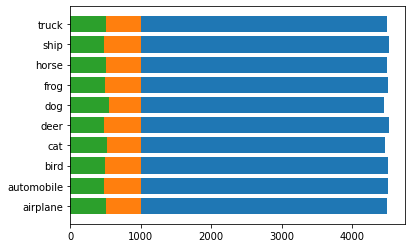

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.10, random_state = 0)
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)
print("X_valid: {}, y_valid: {}", X_valid.shape, y_valid.shape)
classes, counts_train = np.unique(y_train, return_counts=True)
classes, counts_test = np.unique(y_test, return_counts=True)
classes, counts_valid = np.unique(y_valid, return_counts=True)
plt.barh(class_names, counts_train)
plt.barh(class_names, counts_test)
plt.barh(class_names, counts_valid)

In [20]:
print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][0][0]))
print(type(X_train[0][0][0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


In [21]:
X_train = X_train / 255 # przechodzimy z przedziału 0-255 na 0-1
X_test = X_test / 255
X_valid = X_valid / 255

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

In [23]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
Y_valid = np_utils.to_categorical(y_valid) 

In [24]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 36, 36)
    X_test = X_test.reshape(X_test.shape[0], 3, 36, 36)
    X_valid = X_valid.reshape(X_valid.shape[0], 3, 36, 36)
    input_shape = (3, 36, 36)

### Model 

In [25]:
monitor = EarlyStopping(monitor='accuracy', mode='max', patience = 5)

In [26]:
model = Sequential([
  Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
  BatchNormalization(),
  Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
  BatchNormalization(),
  Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'),
  BatchNormalization(),
  Dropout(0.4),
  Conv2D(64,(3,3),activation='relu'),
  BatchNormalization(),
  Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'),
  BatchNormalization(),
  Dropout(0.4),
  Conv2D(128,kernel_size=4,activation='relu'),
  BatchNormalization(),
  Conv2D(256,kernel_size=3,activation='relu'),
  BatchNormalization(),
  Conv2D(512,kernel_size=2,activation='relu'),
  BatchNormalization(),
  Flatten(),
  Dropout(0.4),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
  ])

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 32)       1

In [29]:
M1 = model.fit(X_train, Y_train, epochs=20, batch_size=256, callbacks= [monitor], validation_data=(X_valid, Y_valid))

Epoch 1/20
176/176 [==============================] - 27s 87ms/step - loss: 1.7653 - accuracy: 0.3728 - val_loss: 2.6667 - val_accuracy: 0.1932
Epoch 2/20
176/176 [==============================] - 13s 76ms/step - loss: 1.3057 - accuracy: 0.5295 - val_loss: 2.6084 - val_accuracy: 0.2652
Epoch 3/20
176/176 [==============================] - 14s 79ms/step - loss: 1.0827 - accuracy: 0.6151 - val_loss: 1.2318 - val_accuracy: 0.5704
Epoch 4/20
176/176 [==============================] - 14s 78ms/step - loss: 0.9364 - accuracy: 0.6691 - val_loss: 1.1651 - val_accuracy: 0.6256
Epoch 5/20
176/176 [==============================] - 14s 77ms/step - loss: 0.8219 - accuracy: 0.7111 - val_loss: 0.8780 - val_accuracy: 0.6972
Epoch 6/20
176/176 [==============================] - 14s 77ms/step - loss: 0.7378 - accuracy: 0.7375 - val_loss: 0.8254 - val_accuracy: 0.7224
Epoch 7/20
176/176 [==============================] - 14s 77ms/step - loss: 0.6703 - accuracy: 0.7624 - val_loss: 0.7151 - val_accuracy:

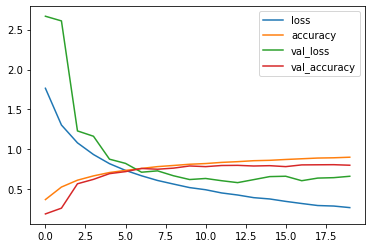

In [30]:
pd.DataFrame(M1.history).plot()

### Wynik modelu dane testowe 

In [31]:
scores = model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.6862 - accuracy: 0.8009


In [32]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.squeeze(np.asarray(y_test))
print(y_pred[:20])
print(y_test[:20])

[3 8 1 0 6 6 1 6 3 1 0 9 4 7 9 8 5 7 8 6]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.87      0.94      0.90      1000
           2       0.82      0.63      0.72      1000
           3       0.62      0.68      0.65      1000
           4       0.72      0.82      0.77      1000
           5       0.85      0.57      0.68      1000
           6       0.79      0.90      0.84      1000
           7       0.82      0.88      0.85      1000
           8       0.89      0.87      0.88      1000
           9       0.91      0.84      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



In [34]:
false_pred = np.nonzero(y_pred != y_test)[0]
print(false_pred[0:10])

[ 2 12 24 26 33 35 52 57 58 59]


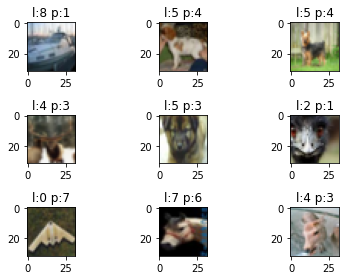

In [35]:
for i in range(9):
  instance_index = false_pred[i] # indeks instancji do narysowania
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_test[instance_index].reshape(32,32,3))
  plt.title("l:{} p:{}".format(y_test[instance_index], y_pred[instance_index]))

[ 0  1  3  4  5  6  7  8  9 10]


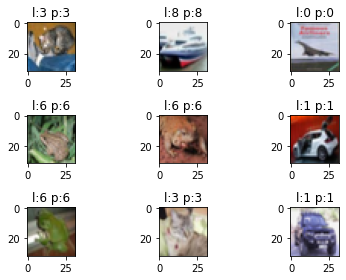

In [36]:
ok_pred = np.nonzero(y_pred == y_test)[0]
print(ok_pred[0:10])
for i in range(9):
  instance_index = ok_pred[i] # indeks instancji do narysowania
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_test[instance_index].reshape(32,32,3))
  plt.title("l:{} p:{}".format(y_test[instance_index], y_pred[instance_index]))

### Wynik modelu dane walidacyjne 

In [37]:
scores = model.evaluate(X_valid, Y_valid)

157/157 [==============================] - 2s 10ms/step - loss: 0.6643 - accuracy: 0.8024


In [38]:
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)
y_valid = np.squeeze(np.asarray(y_valid))
print(y_pred[:20])
print(y_valid[:20])
print(classification_report(y_valid, y_pred))

[7 5 3 6 5 4 3 0 0 2 5 0 6 4 9 2 4 7 7 5]
[7 5 5 6 5 4 3 0 7 2 5 0 3 4 9 2 4 7 7 5]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       503
           1       0.87      0.94      0.90       483
           2       0.81      0.66      0.73       487
           3       0.62      0.69      0.65       527
           4       0.70      0.83      0.76       473
           5       0.85      0.58      0.69       548
           6       0.77      0.91      0.84       491
           7       0.83      0.87      0.85       502
           8       0.91      0.87      0.89       482
           9       0.93      0.85      0.89       504

    accuracy                           0.80      5000
   macro avg       0.81      0.81      0.80      5000
weighted avg       0.81      0.80      0.80      5000



[ 2  8 12 20 24 32 34 35 38 49]


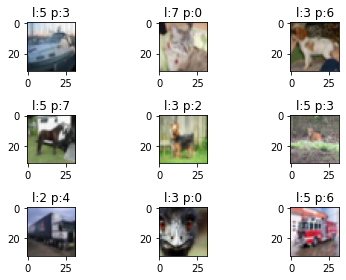

In [39]:
false_pred = np.nonzero(y_pred != y_valid)[0]
print(false_pred[0:10])
for i in range(9):
  instance_index = false_pred[i] 
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_test[instance_index].reshape(32,32,3))
  plt.title("l:{} p:{}".format(y_valid[instance_index], y_pred[instance_index]))

[ 0  1  3  4  5  6  7  9 10 11]


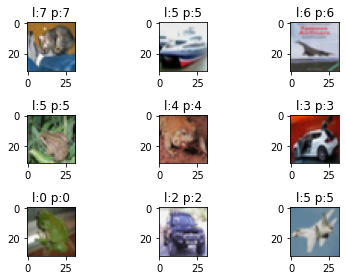

In [40]:
ok_pred = np.nonzero( y_pred == y_valid)[0]
print(ok_pred[0:10])
for i in range(9):
  instance_index = ok_pred[i] # indeks instancji do narysowania
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_test[instance_index].reshape(32,32,3))
  plt.title("l:{} p:{}".format(y_valid[instance_index], y_pred[instance_index]))